In [1]:
+(2, 2)

4

In [4]:
using Gadfly;

<h1>Discrete random variables</h1>

In this lesson we take a look at the outcomes of experiments that have very specific outcomes.  Consider the example where we look at the occurence of bile duct injuries during a cholecystectomy (removal of the gallbladder).  There are certain types of injuries, but for now, let's focus on the two main outcomes: either an injury occurs or it does not.  There cannot be half an injury or 2.754<sup>th</sup> of a injury.  The possible outcomes take on discrete values, which are not infinitely divisible into smaller parts (which would constitute continuous variables).<br/>
Given repetion of our experiment (surgery in this case) and a probability of any of the discrete outcomes, there will be specific distributions of these events (a spread of the lieklihood of events occuring).

<h2>The binomial distribution</h2>

The binomial distribution considers the running of $n$ experiments, with the ouctome of each experiment being either a success or a failure.  So, there are only two possible outcomes.  It is like a coin flip, which can only result in a head (H) or a tail (T) landing face-up.  With a fair coin, the probability of H or T are both 0.05.  This is not a requirement for the binomial distribution, though.  Also note that the terms success and failure are arbitrary.  We migth view either H or T as a success.  The choice is ours.<br/>
In keeping with tradition, let's flip some coins.  If I flip it 10 times, I have 10 experiments.  In total there are ${2}^{10}$ possible outcomes.  I might only be concerned with what the probability of having four H's are.  In order to do this, we will have to construct three parts to our equation.  Remember the multiplication principle?  We'll employ it here.  First off, I have the probability of a success.  We'll make H the success.  The probability of a succuss is $p = 0.5$ and for failure is $1-p = 1- 0.5 = 0.5$.  Flipping 10 times and asking for four successes would be $p \times p \times p \times p = {p}^{4}$ or ${p}^{k}$ for $k$ successes.  With four successes, there has to be $10-4=6$ failures, ${\left(1-p\right)}^{10-4}$ or ${\left(1-p\right)}^{n-k}$.  Lastly, we have to multiply with the number of combinations we can get from taking four objects from a total or 10, $\begin{pmatrix}10\\4\end{pmatrix}$ or $\begin{pmatrix}10\\4\end{pmatrix}$.
There we have it, the binomial distribution $P\left(k\right)=\begin{pmatrix}n\\k\end{pmatrix}{p}^{k}{\left(1-p\right)}^{n-k}$, where $P\left(k\right)$ is the probability of $k$ event, $\begin{pmatrix}n\\k\end{pmatrix}$ is the number of combinations choosing $k$ from $n$ and $p$ is the probability of a success everytime the experiment is conducted.

Let's create some Julia code to do this.

In [3]:
# Creating a function that will calculate the probability
# of a certain number of positive events given a probability
# for the occurence of that outcome
function binomdist(n, k, p)
    return binomial(n, k) * (p^k) * ((1 - p)^(n - k))
end

binomdist (generic function with 1 method)

Let's put this to the test.  Consider that we do 30 cholecystectomies in a row.  The probability of an injury (one of our two discrete outcomes) is a low 0.005 (0.5%).  We can calculate the probability of $5$ injuries occuring in those 30 consecutive cases.

In [4]:
binomdist(30, 5, 0.005)

3.928802435676934e-7

We can create a plot of this.  We'll do it by creating two empty arrays and running a loop.

In [5]:
injuries_binomdist = []
prob_binomdist = []

for i in 0:10
    push!(injuries_binomdist, i)
    push!(prob_binomdist, binomdist(30, i, 0.005))
end

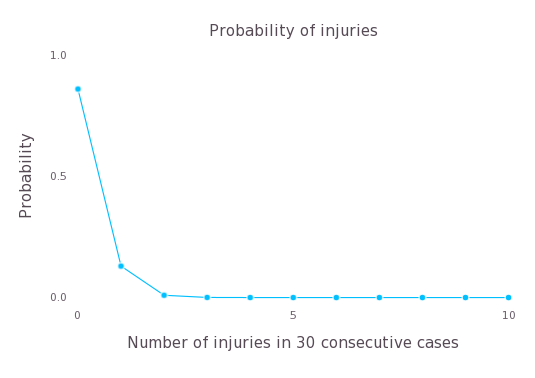

In [6]:
plot(x = injuries_binomdist, y = prob_binomdist, Geom.point, Geom.line,
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("Probability of injuries"),
Guide.xlabel("Number of injuries in 30 consecutive cases"),
Guide.ylabel("Probability"))

We can print a table to the screen containing this information.

In [7]:
print("Injuries", "\t", "Probability", "\n", "\n")
for i in 0:10
    print(i, "\t", binomdist(30, i, 0.005), "\n")
end

Injuries	Probability

0	0.8603841919146961
1	0.12970615958513004
2	0.009450951326554704
3	0.000443260698732884
4	1.5035224705763649e-5
5	3.928802435676934e-7
6	8.226135753092408e-9
7	1.4172811060604292e-10
8	2.0475794873988616e-12
9	2.5151730163470104e-14
10	2.654202680567197e-16


We note that there is an 86% probability of occuring no injuries, a 13% probability of a single injury, which rapidly declines to a less than 1% probability of two injuries.<br/>
These probabilities can be added, i.e. we can ask what the probability was of getting 2 or less injuries, which will sum the three probabilities mentioned, totalling almost 100%.

Turning to another example, we note that a likelihood of rebleeding as high as 59% has been reported for patients presenting with a Forrest type Ia peptic ulcer (arterial squirting seen at endoscopy).  Let's calculate the probabilities of seeing between 0 and 20 rebleeds in 30 consecutive patients.

In [8]:
rebleeds = []
prob_rebleeds = []

for i in 0:20
    push!(rebleeds, i)
    push!(prob_rebleeds, binomdist(30, i, 0.59))
end

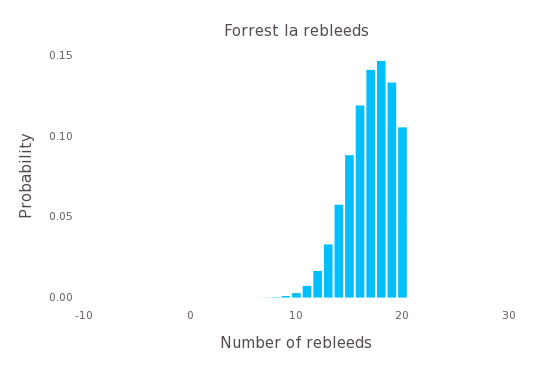

In [9]:
plot(x = rebleeds, y = prob_rebleeds, Geom.bar, Theme(bar_spacing = 2px,
grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("Forrest Ia rebleeds"),
Guide.xlabel("Number of rebleeds"),
Guide.ylabel("Probability"))

In [10]:
print("Rebleeds", "\t", "Probability", "\n", "\n")
for i in 0:20
    print(i, "\t", binomdist(30, i, 0.59), "\n")
end

Rebleeds	Probability

0	2.418330769289526e-12
1	1.0440110882054782e-10
2	2.1784182584385036e-9
3	2.9258105389759415e-8
4	2.8419610906028496e-7
5	2.1266186892608637e-6
6	1.2751067344145423e-5
7	6.291118940526103e-5
8	0.0002602758659235951
9	0.0009155503359588793
10	0.0027667484542757345
11	0.007238942740677087
12	0.016493607342071167
13	0.03286343526694104
14	0.057425131659829036
15	0.08814524274289202
16	0.11891545705405403
17	0.14092420018170534
18	0.14646187200456365
19	0.1331129722454827
20	0.1053540475455101


<h2>The geometric distribution</h2>

With the geometric distribution we are concenrned with the number of failures before hitting a success.  Once again, we run our experiment $n$ number of times, with a probability of success of $p$ everytime the experiment is run.  We can then calculate the probability that each number of failures will occur before the first success.  Note, though that $n$ can approach infinity.<br/>
The equation is $p\left(k\right)=P\left(X=k\right)={\left(1-p\right)}^{k-1}p$ and $k$ includes all the failures and the first success.  The equation is easy to comprehend.  We are looking at $\left(1-p\right) \times \left(1-p\right) \times\left(1-p\right) \times \cdots p $, which if you think about it is the sequence of events.<br/>
If you think back to the coin flipping experiemnts, we are tasked with calculating the probability of $k-1$ number of T's before the first H.  You may well imagine that as $k$ grows, the probability of successive failures, i.e. TTTTTTT... gets smaller and smaller.  This is indeed so, as the sum of $P\left(k\right)$ must equal 1, $\sum _{ k=1 }^{ \infty  }{ { \left( 1-p \right)  }^{ k-1 } p } =1$.

Let's create some Julia code to do this.

In [1]:
function geomdist(k, p)
    return ((1-p)^(k-1)) * p
end

geomdist (generic function with 1 method)

Let's stick to our bile duct injury example, but make the probability of an injury 5%.

In [6]:
injuries_geomdist = []
prob_geomdist = []

for i in 1:30
    push!(injuries_geomdist, i)
    push!(prob_geomdist, geomdist(i, 0.05))
end

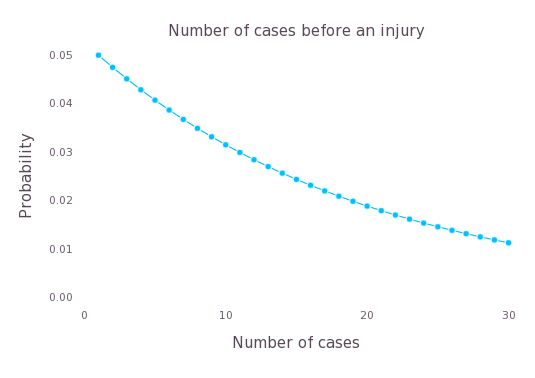

In [7]:
plot(x = injuries_geomdist, y = prob_geomdist, Geom.point, Geom.line,
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("Number of cases before an injury"),
Guide.xlabel("Number of cases"),
Guide.ylabel("Probability"))

In [10]:
print("Experiments (failires and first success)", "\t", "Probability", "\n", "\n")
for i in 1:30
    print(i, "\t", geomdist(i, 0.05), "\n")
end

Experiments (failires and first success)	Probability

1	0.05
2	0.0475
3	0.045125
4	0.04286875
5	0.0407253125
6	0.038689046874999994
7	0.03675459453124999
8	0.03491686480468749
9	0.03317102156445311
10	0.03151247048623045
11	0.029936846961918936
12	0.028440004613822983
13	0.027018004383131834
14	0.025667104163975243
15	0.02438374895577648
16	0.023164561507987652
17	0.02200633343258827
18	0.020906016760958854
19	0.019860715922910912
20	0.018867680126765363
21	0.017924296120427095
22	0.01702808131440574
23	0.01617667724868545
24	0.01536784338625118
25	0.01459945121693862
26	0.013869478656091689
27	0.013176004723287102
28	0.012517204487122747
29	0.011891344262766609
30	0.011296777049628278


<h2>The negative binomial distribution</h2>

Here we conduct a sequence of independent trials, each with the probability of success being $p$ and done so until there are $r$ successes.<br/>
The equations for this is $P\left(X=k\right)=\begin{pmatrix}k-1\\r-1\end{pmatrix}{p}^{r}{\left(1-p\right)}^{k-r}$.

In [11]:
function negbinomdist(r, k, p)
    return binomial(k - 1, r - 1) * (p^r) * ((1 - p)^(k - r))
end

negbinomdist (generic function with 1 method)

Let's calculate the probability of $r=2$ success given a probability of $\frac{1}{10}$ for $k=0,1,2,...,50$.

In [13]:
vals_negbinomdist = []
prob_negbinomdist = []

for i in 1:50
    push!(vals_negbinomdist, i)
    push!(prob_negbinomdist, negbinomdist(2, i, (1/10)))
end

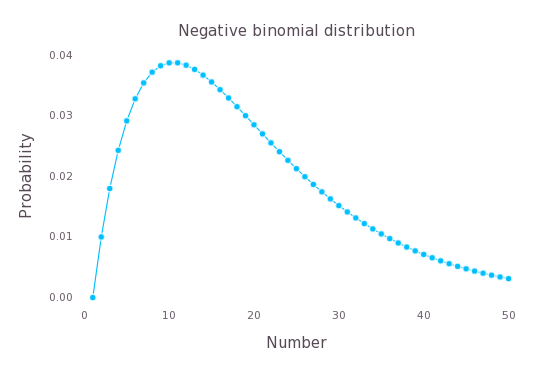

In [14]:
plot(x = vals_negbinomdist, y = prob_negbinomdist, Geom.point, Geom.line,
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("Negative binomial distribution"),
Guide.xlabel("Number"),
Guide.ylabel("Probability"))

<h2>The hypergeometric distribution</h2>

We saw the hypergeometric equation in the previous lesson when we were considering the defecctive equipment example.  The equation for the hypergeometric distribution is $P\left(X=k\right)=\frac{\begin{pmatrix}r\\k\end{pmatrix}\begin{pmatrix}n-r\\m-k\end{pmatrix}}{\begin{pmatrix}n\\m\end{pmatrix}}$.

In [15]:
function hypergeomdist(m, n, r, k)
    return ((binomial(r, k)) * (binomial(n - r, m - k))) / (binomial(n, m))
end

hypergeomdist (generic function with 1 method)

In some countries the national lottery reuqires a player to pick six numbers between $1$ and $49$, inclusive.  Six numbers are chosen at random by the lottery.  We can use the hypergeometric distribution to calculate the probability of matching none trough all six numbers.

In [21]:
vals_hypergeomdist = []
prob_hypergeomdist = []

for i in 0:6
    push!(vals_hypergeomdist, i)
    push!(prob_hypergeomdist, hypergeomdist(6, 49, 6, i))
end

In [22]:
print("Number", "\t", "Probability", "\n", "\n")
for i in 1:7
    print(vals_hypergeomdist[i], "\t", prob_hypergeomdist[i], "\n")
end

Number	Probability

0	0.4359649755116915
1	0.4130194504847604
2	0.13237802900152576
3	0.017650403866870102
4	0.000968619724401408
5	1.8449899512407772e-5
6	7.151123842018516e-8


<h2>The Poisson distribution</h2>

The equation for the Poisson distribution is $P\left(X=k\right)=\frac{{\lambda}^{k}}{k!}{e}^{-\lambda}$.<br/>
It is derived by way of the probability of success approaching zero in such as way that $np=\lambda$.  We start with the binomial distribution function $p\left(k\right)=\frac{n!}{\left(n-k\right)!\left(k!\right)}$ and setting $np=\lambda$.

In [24]:
function poissondist(l, k)
    return ((l^k) / (factorial(k))) * (exp(-l))
end

poissondist (generic function with 1 method)

In [25]:
vals_pdist = []
prob_pdist = []

for i in 0:20
    push!(vals_pdist, i)
    push!(prob_pdist, poissondist(5, i))
end

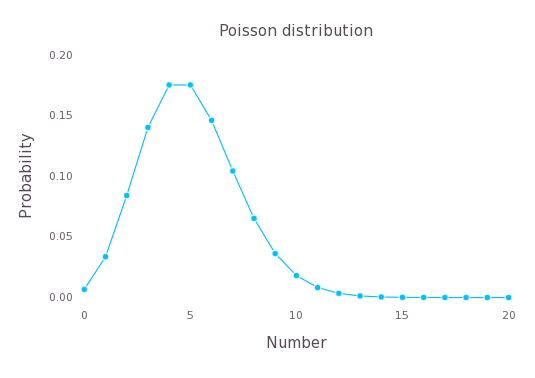

In [26]:
plot(x = vals_pdist, y = prob_pdist, Geom.point, Geom.line,
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("Poisson distribution"),
Guide.xlabel("Number"),
Guide.ylabel("Probability"))